In [1]:
from pandas import Series,DataFrame
import pandas as pd

In [2]:
data=pd.read_csv("train.csv")

In [3]:
#Normalizing the features
data['A_mentions_received']=data['A_mentions_received']/data['A_follower_count']
data['A_retweets_received']=data['A_retweets_received']/data['A_follower_count']

In [4]:
#lets us try a couple of classification models
from patsy import dmatrices
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
formula='Choice~A_follower_count+A_following_count+A_listed_count+\
       A_mentions_received+A_retweets_received+A_mentions_sent+A_retweets_sent+A_posts+A_network_feature_1+A_network_feature_2+A_network_feature_3+\
B_follower_count+B_following_count+B_listed_count+B_mentions_received+\
B_retweets_received+B_mentions_sent+B_retweets_sent+B_posts+B_network_feature_1+B_network_feature_2+\
B_network_feature_3'

In [15]:
from sklearn import cross_validation
from sklearn import metrics
from sklearn import neighbors

In [7]:
Y, X = dmatrices(formula, data, return_type='dataframe')
y = Y['Choice'].values

In [8]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [11]:
kfold = cross_validation.StratifiedKFold(y, n_folds=10, shuffle=True)

In [12]:
def cv_accuracy_score(X, y, kfold, nn):
    """For each fold, fit the nearest neighbors model
    with nn nearest neighbors on the train, and return accuracy
    on the test."""
    model = neighbors.KNeighborsClassifier(n_neighbors=nn, weights='uniform')
    accuracies = []
    for train, test in kfold:
        # Select the training and testing data using the indices
        # provided by kfold
        X_train = X.ix[train]
        X_test = X.ix[test]
        y_train = y[train]
        y_test = y[test]
        # Fit the model
        model.fit(X_train, y_train)
        # Compute test accuracy
        accuracy = metrics.accuracy_score(y_test, model.predict(X_test))
        accuracies.append(accuracy)
    average_accuracy = sum(accuracies) * 1.0 / len(accuracies)
    return average_accuracy

In [13]:
nn = [(x + 1) for x in range(100)]

In [16]:
scores = [cv_accuracy_score(X, y, kfold, num_nbrs) for num_nbrs in nn]

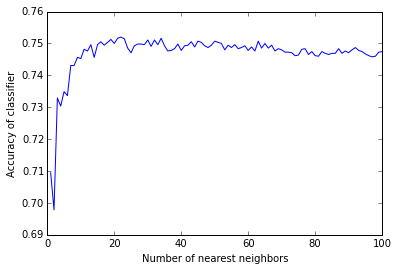

In [17]:
plot(nn, scores)
xlabel('Number of nearest neighbors')
ylabel('Accuracy of classifier')

In [18]:
scores

[0.70945514710942703,
 0.69782075372751051,
 0.73291237206193627,
 0.73036724869714065,
 0.73491006221207644,
 0.73363931961908813,
 0.74309619535932347,
 0.74309123486208373,
 0.74564131752201135,
 0.74527503291521024,
 0.7481861145145785,
 0.74764296741476821,
 0.74963835011926405,
 0.74564362977608645,
 0.74964065876701624,
 0.75055206553650522,
 0.7494578458411133,
 0.75036727033507855,
 0.75127371540521992,
 0.75000462030077331,
 0.7516399891930523,
 0.7520062737998533,
 0.75146081925439867,
 0.74855238830241055,
 0.74709882797508875,
 0.74928032339100148,
 0.74982213494920635,
 0.74982411842683772,
 0.74964064554383203,
 0.75109420587115383,
 0.74909651211469064,
 0.75109552939168256,
 0.74964164269213218,
 0.75163998799094456,
 0.74927602044664909,
 0.74764263142567855,
 0.7478237872461786,
 0.74837023773782574,
 0.74982544194736633,
 0.74782411842683771,
 0.74927899626414995,
 0.74945982330820626,
 0.75055172714320018,
 0.7489127164657795,
 0.75073288657002324,
 0.7503676015157

In [34]:
model = neighbors.KNeighborsClassifier(n_neighbors=22, weights='uniform', p=1)

In [35]:
model.fit(X_train, Y_train)
predicted_classes_train = model.predict(X_train)
print metrics.accuracy_score(Y_train, predicted_classes_train)
confusion_matrix(Y_train, predicted_classes_train)

0.772467532468


array([[1484,  394],
       [ 482, 1490]])

In [36]:
predicted_classes = model.predict(X_test)
print metrics.accuracy_score(Y_test, predicted_classes)
confusion_matrix(Y_test, predicted_classes)

0.767878787879


array([[625, 195],
       [188, 642]])

In [37]:
s1 = pd.Series(Y_test, name='Y Test')
s2 = pd.Series(predicted_classes, name='Precicted Classes')
results = pd.concat([s1,s2],axis=1)


In [38]:
results.to_csv('SocialMediaKNN - Results.csv', header=True, index=False)
X_test.to_csv('SocialMediaKNN - X_test.csv', header=True, index=False)